In [13]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Define the directory where your CSV files are located
directory = '/Users/dhewitt/OneDrive - Nexus365/Data/PPS_VRStudy/Modelling/SingleTrialEEGData/'

# Define the pattern to match the CSV files
file_pattern = directory + 'P*_datEVT.csv'

# Get a list of all CSV files matching the pattern
csv_files = glob.glob(file_pattern)
dfs = []

# Loop through each CSV file
for csv_file in csv_files:
    # Extract participant ID from the file name
    participant_id = csv_file.split('/')[-1].split('_')[0][1:]
    
    # Load CSV file into a DataFrame
    df = pd.read_csv(csv_file)
    
    # Add participant ID column
    df['Participant_ID'] = participant_id
    
    # Append DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into one large DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

In [9]:
combined_df.to_csv(directory + 'Alleeg.csv')

In [12]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9360 entries, 0 to 9359
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   latency         9342 non-null   float64
 1   type            9360 non-null   object 
 2   epoch           9360 non-null   int64  
 3   Block           9360 non-null   int64  
 4   Include         9360 non-null   int64  
 5   pain            3655 non-null   object 
 6   Freq_f1_t1_el1  9360 non-null   float64
 7   Freq_f1_t1_el2  9360 non-null   float64
 8   Freq_f1_t1_el3  9360 non-null   float64
 9   Freq_f1_t2_el1  9360 non-null   float64
 10  Freq_f1_t2_el2  9360 non-null   float64
 11  Freq_f1_t2_el3  9360 non-null   float64
 12  Freq_f1_t3_el1  9360 non-null   float64
 13  Freq_f1_t3_el2  9360 non-null   float64
 14  Freq_f1_t3_el3  9360 non-null   float64
 15  Freq_f2_t1_el1  9360 non-null   float64
 16  Freq_f2_t1_el2  9360 non-null   float64
 17  Freq_f2_t1_el3  9360 non-null   f

In [16]:
grouped_df = combined_df.groupby(['epoch', 'type', 'Participant_ID']).agg({
    'Freq_f1_t1_el1': 'mean'
}).reset_index()
grouped_df

,epoch,type,Participant_ID,Freq_f1_t1_el1
0,1,left,02,132.765956
1,1,left,04,17.125339
2,1,left,08,-21.623554
3,1,left,10,8.386215
4,1,left,13,-24.229704
...,...,...,...,...
9355,360,right,17,8.758496
9356,360,right,21,-65.757835
9357,360,right,22,5.192411
9358,360,right,24,25.835954


In [17]:
data2load = pd.read_csv('/Users/dhewitt/Data/pps/tonicpainsides.csv')
sidesdf = pd.DataFrame(data2load).astype('int32')

In [29]:
sidesdf = sidesdf.rename({'ID' : 'Participant_ID'},axis=1)
combined_df['Participant_ID'] = combined_df['Participant_ID'].astype('int32')

In [42]:
combined_df = pd.merge(combined_df,sidesdf, on='Participant_ID')
combined_df.drop(columns=['B2'],inplace = True)
combined_df

,latency,type,epoch,Block,Include,pain,Freq_f1_t1_el1,Freq_f1_t1_el2,Freq_f1_t1_el3,Freq_f1_t2_el1,...,Freq_f3_t1_el3,Freq_f3_t2_el1,Freq_f3_t2_el2,Freq_f3_t2_el3,Freq_f3_t3_el1,Freq_f3_t3_el2,Freq_f3_t3_el3,Participant_ID,congruency,B1
0,1251.0,middle,1,1,1,nPCollNoShock,84.717666,55.937957,38.038957,10.083858,...,68.023919,57.380406,4.970013,70.130336,81.745067,80.722153,87.411712,16,-1.0,2
1,4251.0,right,2,1,1,PCollShock,1.837269,11.790846,79.662190,-6.334087,...,21.021438,43.668933,-9.693051,32.263670,76.975799,13.071432,20.947232,16,-1.0,2
2,7251.0,right,3,1,1,PCollShock,-30.558103,38.882345,27.250060,-31.115323,...,143.989528,48.778112,121.091798,67.535705,75.015480,100.552867,22.057330,16,-1.0,2
3,10251.0,left,4,1,1,PCollShock,5.936221,37.020377,63.117695,35.110421,...,39.395846,43.007762,140.517548,53.146010,57.255875,66.786078,77.292349,16,-1.0,2
4,13251.0,left,5,1,1,PCollNoShock,-5.096196,25.909149,53.337064,-9.571798,...,48.709259,28.972982,84.067207,47.454706,38.552883,99.940679,55.415618,16,-1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,1057251.0,right,356,4,1,NaN,-17.958245,-23.950002,2.819912,-0.144275,...,-7.274019,15.451696,23.324579,19.790860,17.849350,-22.141770,-21.905713,4,NaN,2
9356,1060251.0,left,357,4,1,NaN,-42.990868,-18.135045,15.033674,-6.149864,...,-27.522026,12.131343,14.004475,-8.729786,53.565134,29.242283,38.148617,4,NaN,2
9357,1063251.0,middle,358,4,1,NaN,-14.337524,14.757488,14.460428,38.636152,...,8.873661,29.469347,8.716073,20.471042,7.482974,7.296072,32.285839,4,0.0,2
9358,1066251.0,middle,359,4,1,NaN,34.473348,-53.497161,-59.498648,8.838805,...,-14.561863,40.391496,-12.969988,23.884387,63.470874,60.539925,42.305906,4,0.0,2


In [43]:
combined_df['congruency'] = float('nan')

# Set congruency for Block 1 and 3 (conditioning acquisition)
conditioning_index = combined_df['Block'].isin([1, 3])
combined_df.loc[conditioning_index, 'congruency'] = -1

extinction_index = combined_df['Block'].isin([2, 4])

# Handle neutral condition (middle tonic pain side)
neutral_index = extinction_index & (combined_df['type'] == 'middle')
combined_df.loc[neutral_index, 'congruency'] = 0


In [48]:
block2_index = combined_df['Block'] == 2

# Congruent cases for Block 2
cong_block2 = block2_index & (
    ((combined_df['type'] == 'left') & (combined_df['B1'] == 1)) | 
    ((combined_df['type'] == 'right') & (combined_df['B1'] == 2))
)
combined_df.loc[cong_block2, 'congruency'] = 2

incong_block2 = block2_index & (
    ((combined_df['type'] == 'left') & (combined_df['B1'] == 2)) | 
    ((combined_df['type'] == 'right') & (combined_df['B1'] == 1))
)
combined_df.loc[incong_block2, 'congruency'] = 1

block4_index = combined_df['Block'] == 4

# Congruent cases for Block 4 (pain is on the opposite side of B1)
cong_block4 = block4_index & (
    ((combined_df['type'] == 'left') & (combined_df['B1'] == 2)) | 
    ((combined_df['type'] == 'right') & (combined_df['B1'] == 1))
)
combined_df.loc[cong_block4, 'congruency'] = 2

# Incongruent cases for Block 4 (pain is on the opposite side of B1)
incong_block4 = block4_index & (
    ((combined_df['type'] == 'left') & (combined_df['B1'] == 1)) | 
    ((combined_df['type'] == 'right') & (combined_df['B1'] == 2))
)
combined_df.loc[incong_block4, 'congruency'] = 1

# Create a new column to average Freq_f1_t1_el1, Freq_f1_t2_el1, and Freq_f1_t3_el1
combined_df['Avg_Freq'] = combined_df[['Freq_f1_t1_el1', 'Freq_f1_t2_el1', 'Freq_f1_t3_el1']].mean(axis=1)

combined_df

,latency,type,epoch,Block,Include,pain,Freq_f1_t1_el1,Freq_f1_t1_el2,Freq_f1_t1_el3,Freq_f1_t2_el1,...,Freq_f3_t1_el3,Freq_f3_t2_el1,Freq_f3_t2_el2,Freq_f3_t2_el3,Freq_f3_t3_el1,Freq_f3_t3_el2,Freq_f3_t3_el3,Participant_ID,congruency,B1
0,1251.0,middle,1,1,1,nPCollNoShock,84.717666,55.937957,38.038957,10.083858,...,68.023919,57.380406,4.970013,70.130336,81.745067,80.722153,87.411712,16,-1.0,2
1,4251.0,right,2,1,1,PCollShock,1.837269,11.790846,79.662190,-6.334087,...,21.021438,43.668933,-9.693051,32.263670,76.975799,13.071432,20.947232,16,-1.0,2
2,7251.0,right,3,1,1,PCollShock,-30.558103,38.882345,27.250060,-31.115323,...,143.989528,48.778112,121.091798,67.535705,75.015480,100.552867,22.057330,16,-1.0,2
3,10251.0,left,4,1,1,PCollShock,5.936221,37.020377,63.117695,35.110421,...,39.395846,43.007762,140.517548,53.146010,57.255875,66.786078,77.292349,16,-1.0,2
4,13251.0,left,5,1,1,PCollNoShock,-5.096196,25.909149,53.337064,-9.571798,...,48.709259,28.972982,84.067207,47.454706,38.552883,99.940679,55.415618,16,-1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,1057251.0,right,356,4,1,NaN,-17.958245,-23.950002,2.819912,-0.144275,...,-7.274019,15.451696,23.324579,19.790860,17.849350,-22.141770,-21.905713,4,1.0,2
9356,1060251.0,left,357,4,1,NaN,-42.990868,-18.135045,15.033674,-6.149864,...,-27.522026,12.131343,14.004475,-8.729786,53.565134,29.242283,38.148617,4,2.0,2
9357,1063251.0,middle,358,4,1,NaN,-14.337524,14.757488,14.460428,38.636152,...,8.873661,29.469347,8.716073,20.471042,7.482974,7.296072,32.285839,4,0.0,2
9358,1066251.0,middle,359,4,1,NaN,34.473348,-53.497161,-59.498648,8.838805,...,-14.561863,40.391496,-12.969988,23.884387,63.470874,60.539925,42.305906,4,0.0,2


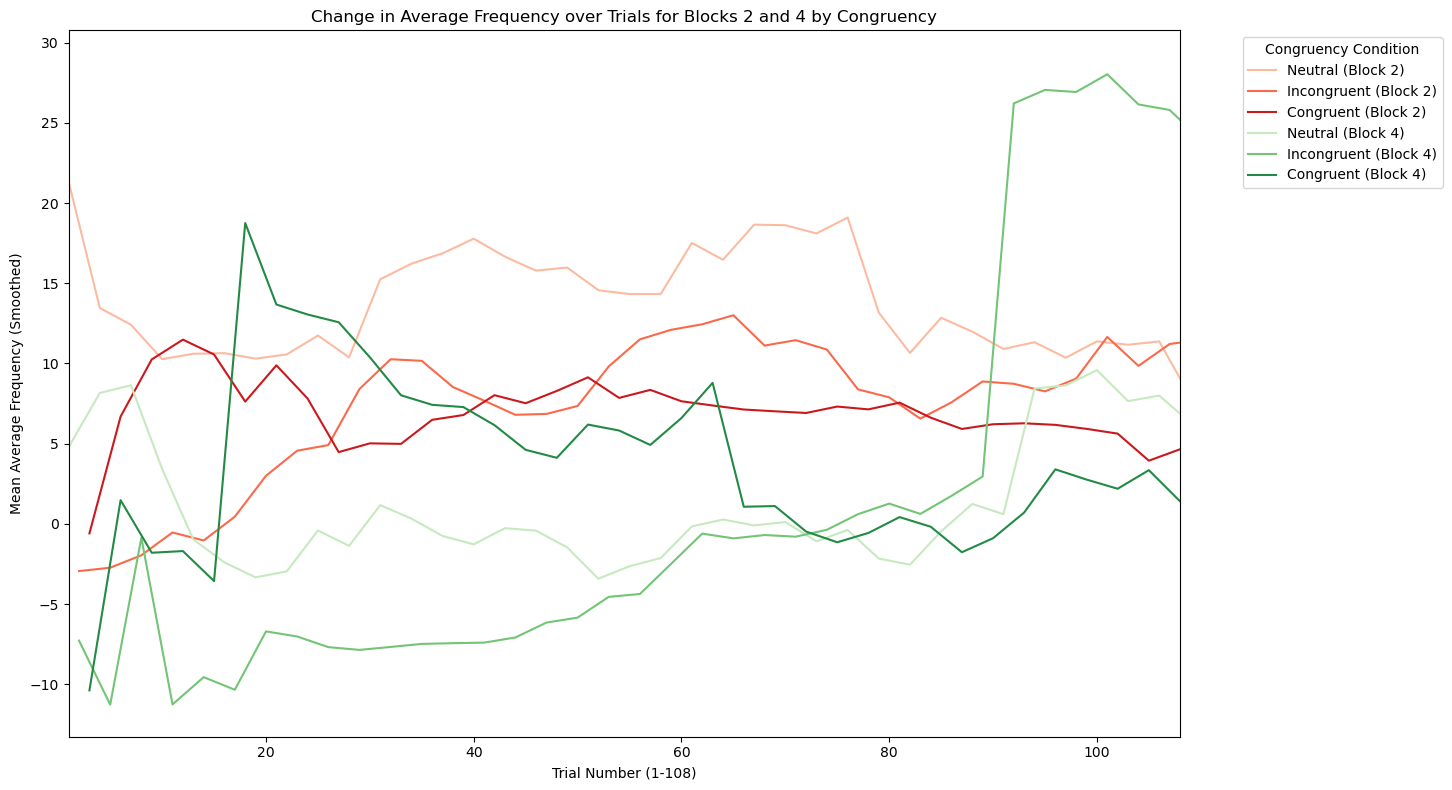

In [94]:

# Group the data by 'epoch', 'congruency', and 'Participant_ID', then calculate the mean of 'Avg_Freq'
grouped_df = combined_df.groupby(['epoch', 'congruency', 'Participant_ID']).agg({'Avg_Freq': 'mean'}).reset_index()

# Average over participants for each epoch and congruency
average_df = grouped_df.groupby(['epoch', 'congruency']).agg({'Avg_Freq': 'mean'}).reset_index()

# Create separate dataframes for blocks 2 and 4
block_2 = combined_df[combined_df['Block'] == 2]
block_4 = combined_df[combined_df['Block'] == 4]

# Average the frequency for each block
block_2_avg = block_2.groupby(['epoch', 'congruency', 'Participant_ID']).agg({'Avg_Freq': 'mean'}).reset_index()
block_4_avg = block_4.groupby(['epoch', 'congruency', 'Participant_ID']).agg({'Avg_Freq': 'mean'}).reset_index()

# Average over participants for blocks 2 and 4
block_2_avg = block_2_avg.groupby(['epoch', 'congruency']).agg({'Avg_Freq': 'mean'}).reset_index()
block_4_avg = block_4_avg.groupby(['epoch', 'congruency']).agg({'Avg_Freq': 'mean'}).reset_index()

# Add a new column to identify the block
block_2_avg['Block'] = 'Block 2'
block_4_avg['Block'] = 'Block 4'

# Concatenate the two blocks into one DataFrame for plotting
stacked_blocks = pd.concat([block_2_avg, block_4_avg], ignore_index=True)

# Create a new epoch column for plotting (1-108)
stacked_blocks['trial'] = stacked_blocks.groupby('Block').cumcount() + 1

# Apply a moving average to smooth the data
stacked_blocks['Avg_Freq'] = stacked_blocks.groupby(['Block', 'congruency'])['Avg_Freq'].transform(lambda x: x.rolling(window=16, min_periods=1).mean())

# Set up the plot
plt.figure(figsize=(12, 8))

# Get the unique values of congruency for coloring
congruencies = stacked_blocks['congruency'].unique()

# Create color palettes based on the number of unique congruency values
block_2_colors = sns.color_palette("Reds", n_colors=len(congruencies))
block_4_colors = sns.color_palette("Greens", n_colors=len(congruencies))

# Simplified legend strings for congruency
legend_labels = {
    0: 'Neutral (Block 2)',
    1: 'Incongruent (Block 2)',
    2: 'Congruent (Block 2)',
}

# Plot for each block with specific colors
for block in ['Block 2', 'Block 4']:
    block_data = stacked_blocks[stacked_blocks['Block'] == block]
    
    # Map colors based on congruency
    color_map = {cong: block_2_colors[i] if block == 'Block 2' else block_4_colors[i]
                 for i, cong in enumerate(congruencies)}
    
    for congruency in congruencies:
        subset = block_data[block_data['congruency'] == congruency]
        
        # Update the legend labels to include block information
        legend_label = f'{legend_labels[congruency]}' if block == 'Block 2' else f'{legend_labels[congruency].replace("Block 2", "Block 4")}'

        sns.lineplot(data=subset, x='trial', y='Avg_Freq', label=legend_label,
                     color=color_map[congruency], markers=True, dashes=False)

# Set title and labels
plt.title('Change in Average Frequency over Trials for Blocks 2 and 4 by Congruency')
plt.ylabel('Mean Average Frequency (Smoothed)')
plt.xlabel('Trial Number (1-108)')

# Set x-axis limits from 1 to 108
plt.xlim(1, 108)

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.legend(title='Congruency Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [103]:
# Group the data by 'epoch', 'congruency', and 'Participant_ID', then calculate the mean of 'Avg_Freq'
grouped_df = combined_df.groupby(['epoch', 'congruency', 'Participant_ID','Block']).agg({'Avg_Freq': 'mean'}).reset_index()
average_df = grouped_df.groupby(['epoch', 'congruency','Block']).agg({'Avg_Freq': 'mean'}).reset_index()

average_df

,epoch,congruency,Block,Avg_Freq
0,1,-1.0,1,7.584287
1,2,-1.0,1,2.614416
2,3,-1.0,1,1.459174
3,4,-1.0,1,2.818291
4,5,-1.0,1,11.917533
...,...,...,...,...
789,359,1.0,4,-3.846944
790,359,2.0,4,2.207215
791,360,0.0,4,44.779412
792,360,1.0,4,6.854662


In [110]:
average_df = grouped_df.groupby(['epoch', 'congruency', 'Block']).agg({'Avg_Freq': 'mean'}).reset_index()

# Create a column for trial numbers for each block
average_df['trial'] = average_df.groupby(['Block', 'congruency']).cumcount() + 1
average_df

,epoch,congruency,Block,Avg_Freq,trial
0,1,-1.0,1,7.584287,1
1,2,-1.0,1,2.614416,2
2,3,-1.0,1,1.459174,3
3,4,-1.0,1,2.818291,4
4,5,-1.0,1,11.917533,5
...,...,...,...,...,...
789,359,1.0,4,-3.846944,107
790,359,2.0,4,2.207215,107
791,360,0.0,4,44.779412,108
792,360,1.0,4,6.854662,108


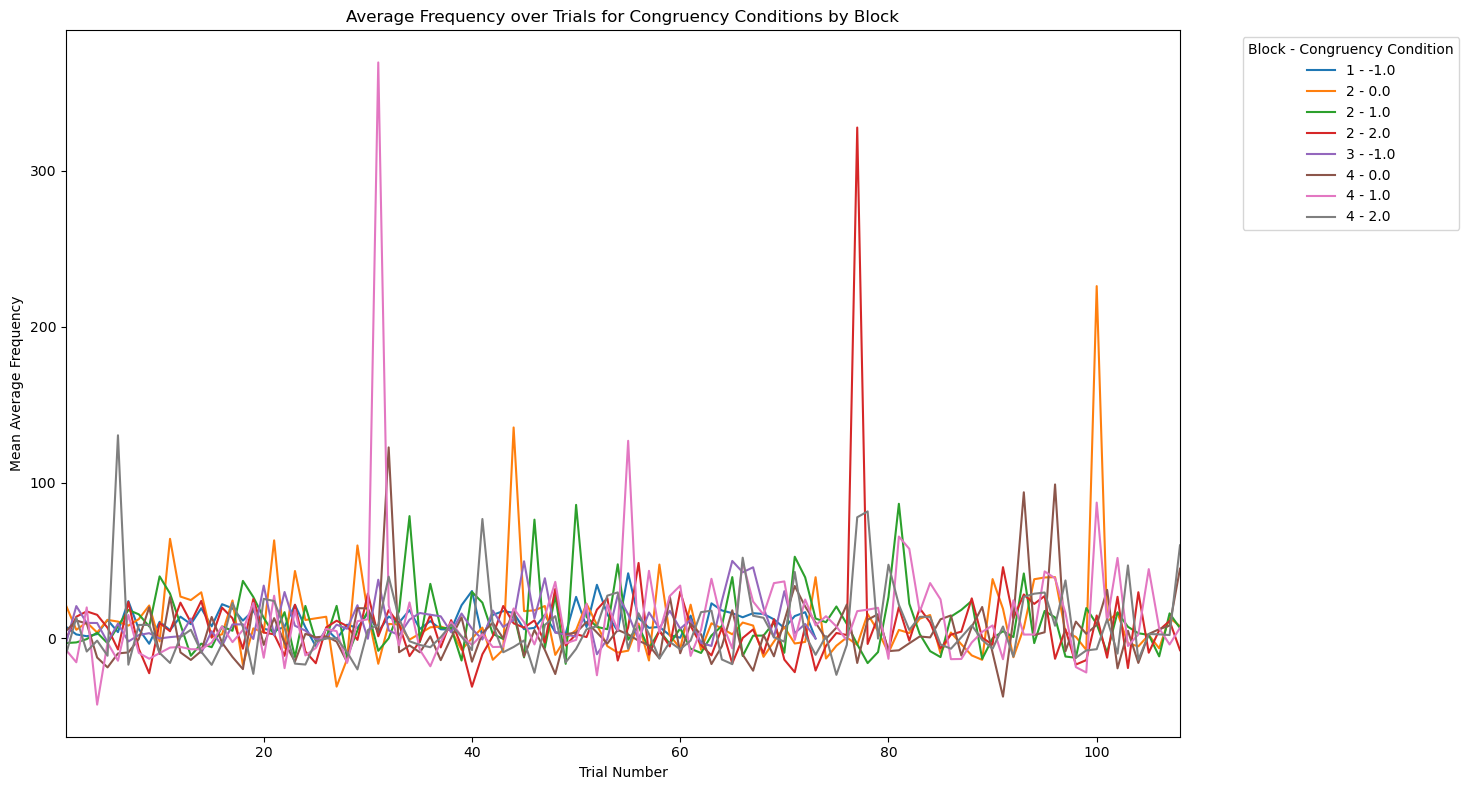

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 8))

# Create a unique label for each combination of Block and Congruency
average_df['Block_Condition'] = average_df['Block'].astype(str) + ' - ' + average_df['congruency'].astype(str)

# Plot using seaborn
sns.lineplot(data=average_df, x='trial', y='Avg_Freq', hue='Block_Condition', markers=True, dashes=False)

# Set title and labels
plt.title('Average Frequency over Trials for Congruency Conditions by Block')
plt.ylabel('Mean Average Frequency')
plt.xlabel('Trial Number')

# Set x-axis limits from 1 to the maximum number of trials (you can adjust this if needed)
plt.xlim(1, average_df['trial'].max())

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plot with a legend
plt.legend(title='Block - Congruency Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/var/folders/m9/8l65rzcd5x5903xt73lz9ln00000gn/T/ipykernel_26730/3110060097.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Block_Condition'] = filtered_df['Block'].astype(str) + ' - ' + filtered_df['congruency'].astype(str)
/var/folders/m9/8l65rzcd5x5903xt73lz9ln00000gn/T/ipykernel_26730/3110060097.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Avg_Freq_MA'] = filtered_df.groupby('Block_Condition')['Avg_Freq'].transform(lambda x: x.rolling(window=20, min_periods=1).mean

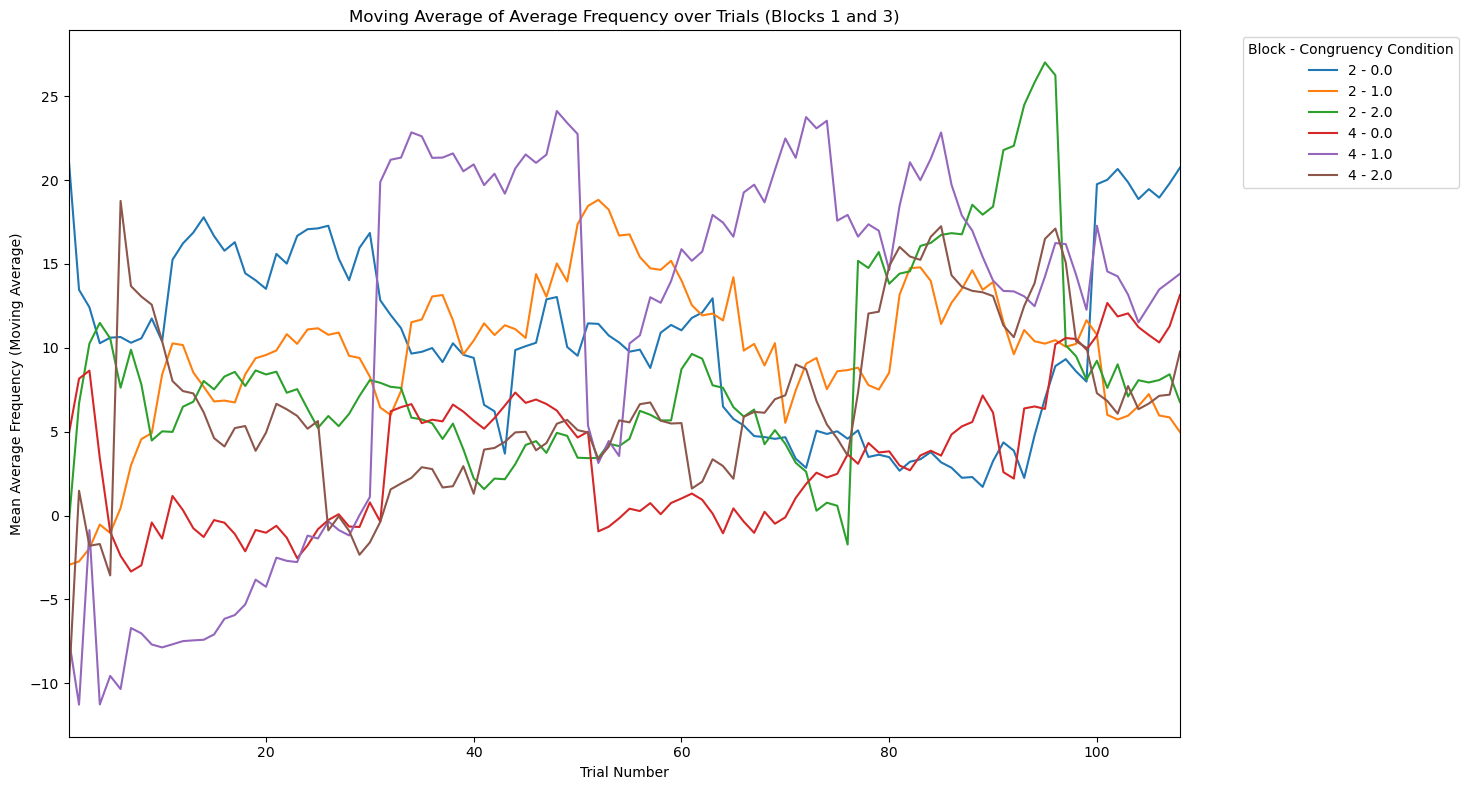

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming average_df is already defined

# Filter for only blocks 2 and 4
filtered_df = average_df[average_df['Block'].isin([2, 4])]

# Create a unique label for each combination of Block and Congruency
filtered_df['Block_Condition'] = filtered_df['Block'].astype(str) + ' - ' + filtered_df['congruency'].astype(str)

# Calculate the moving average of Avg_Freq with a window of 20
filtered_df['Avg_Freq_MA'] = filtered_df.groupby('Block_Condition')['Avg_Freq'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())

# Create the plot
plt.figure(figsize=(12, 8))

# Plot using seaborn for the moving average
sns.lineplot(data=filtered_df, x='trial', y='Avg_Freq_MA', hue='Block_Condition', markers=True, dashes=False)

# Set title and labels
plt.title('Moving Average of Average Frequency over Trials (Blocks 1 and 3)')
plt.ylabel('Mean Average Frequency (Moving Average)')
plt.xlabel('Trial Number')

# Set x-axis limits from 1 to the maximum number of trials
plt.xlim(1, filtered_df['trial'].max())

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plot with a legend
plt.legend(title='Block - Congruency Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/var/folders/m9/8l65rzcd5x5903xt73lz9ln00000gn/T/ipykernel_26730/459725164.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_2_4['trial'] = filtered_df_2_4.groupby(['Block', 'congruency']).cumcount() + 1


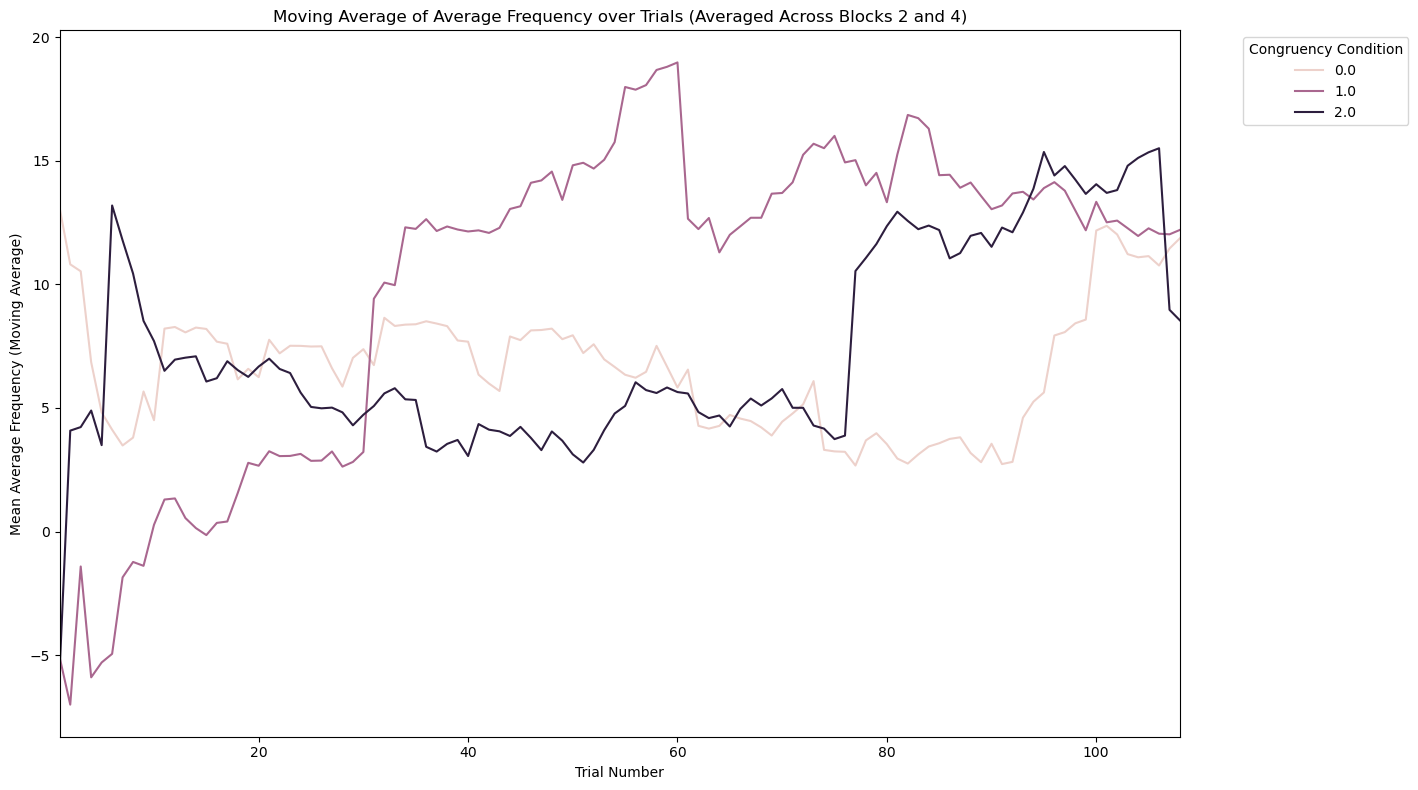

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming average_df is already defined

# Filter for only blocks 2 and 4
filtered_df_2_4 = average_df[average_df['Block'].isin([2, 4])]

# Create a new trial column
filtered_df_2_4['trial'] = filtered_df_2_4.groupby(['Block', 'congruency']).cumcount() + 1

# Average across blocks 2 and 4 for each congruency
averaged_blocks = filtered_df_2_4.groupby(['trial', 'congruency']).agg({'Avg_Freq': 'mean'}).reset_index()

# Calculate the moving average of Avg_Freq with a window of 20
averaged_blocks['Avg_Freq_MA'] = averaged_blocks.groupby('congruency')['Avg_Freq'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

# Create the plot
plt.figure(figsize=(12, 8))

# Plot using seaborn for the moving average
sns.lineplot(data=averaged_blocks, x='trial', y='Avg_Freq_MA', hue='congruency', markers=True, dashes=False)

# Set title and labels
plt.title('Moving Average of Average Frequency over Trials (Averaged Across Blocks 2 and 4)')
plt.ylabel('Mean Average Frequency (Moving Average)')
plt.xlabel('Trial Number')

# Set x-axis limits from 1 to the maximum number of trials
plt.xlim(1, averaged_blocks['trial'].max())

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plot with a legend
plt.legend(title='Congruency Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


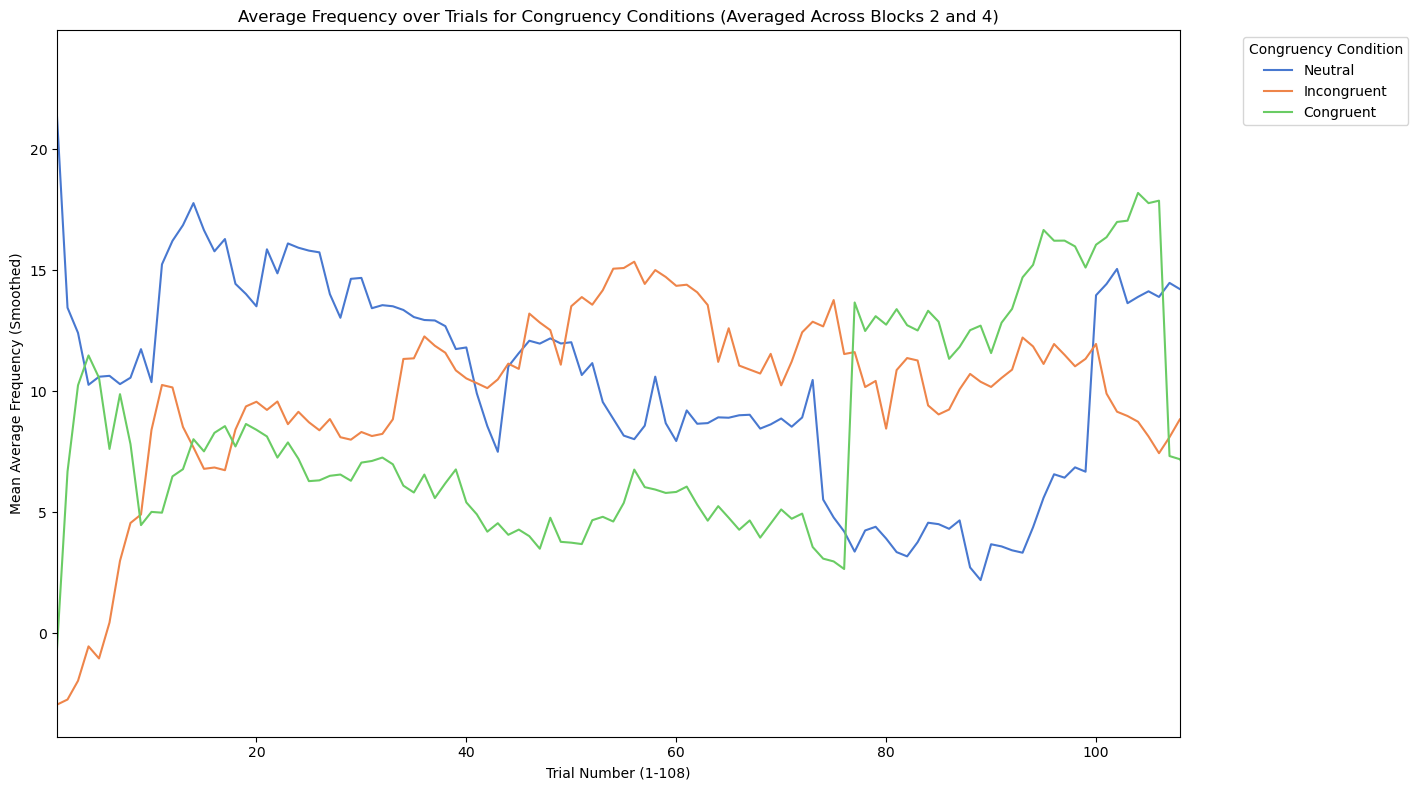

In [76]:
averaged_blocks = pd.concat([block_2_avg, block_4_avg], ignore_index=True)

# Create a new epoch column for plotting (1-108)
averaged_blocks['trial'] = averaged_blocks.groupby('congruency').cumcount() + 1
final_avg = averaged_blocks.groupby(['trial', 'congruency']).agg({'Avg_Freq': 'mean'}).reset_index()

# Apply a moving average to smooth the data
final_avg['Avg_Freq'] = final_avg.groupby('congruency')['Avg_Freq'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

# Set up the plot
plt.figure(figsize=(12, 8))

# Get the unique values of congruency for coloring
congruencies = final_avg['congruency'].unique()

# Create color palettes based on the number of unique congruency values
block_colors = sns.color_palette("muted", n_colors=len(congruencies))

# Simplified legend strings for congruency
legend_labels = {
    0: 'Neutral',
    1: 'Incongruent',
    2: 'Congruent',
}

# Plot for each congruency
for i, congruency in enumerate(congruencies):
    subset = final_avg[final_avg['congruency'] == congruency]
    sns.lineplot(data=subset, x='trial', y='Avg_Freq', label=legend_labels[congruency],
                 color=block_colors[i], markers=True, dashes=False)

# Set title and labels
plt.title('Average Frequency over Trials for Congruency Conditions (Averaged Across Blocks 2 and 4)')
plt.ylabel('Mean Average Frequency (Smoothed)')
plt.xlabel('Trial Number (1-108)')

# Set x-axis limits from 1 to 108
plt.xlim(1, 108)

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.legend(title='Congruency Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

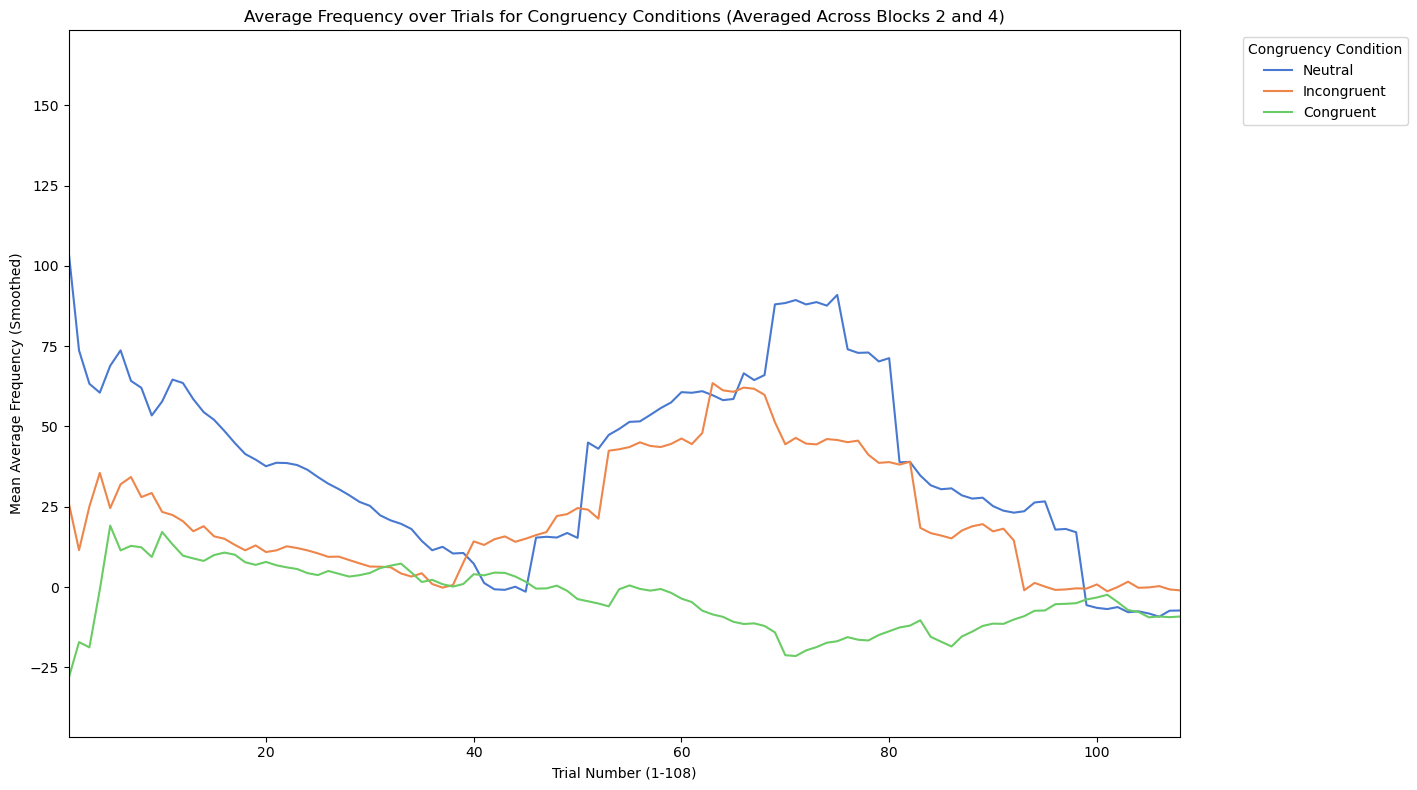

In [93]:

# Create separate dataframes for blocks 2 and 4
block_2 = combined_df[combined_df['Block'] == 2]
block_4 = combined_df[combined_df['Block'] == 4]

# Create separate dataframes for blocks 2 and 4
# Assuming that each block has a set number of epochs (here just use the original epoch numbers)
# Extract the relevant trials for blocks 2 and 4
block_2_epochs = block_2[['epoch', 'Avg_Freq', 'congruency']]
block_4_epochs = block_4[['epoch', 'Avg_Freq', 'congruency']]

# Combine blocks 2 and 4 for averaging
averaged_blocks = pd.concat([block_2_epochs, block_4_epochs], ignore_index=True)

# Create a new trial column for plotting (1-108)
averaged_blocks['trial'] = averaged_blocks.groupby('congruency').cumcount() + 1

# Average across blocks 2 and 4 for each congruency
final_avg = averaged_blocks.groupby(['trial', 'congruency']).agg({'Avg_Freq': 'mean'}).reset_index()

# Apply a moving average to smooth the data
final_avg['Avg_Freq'] = final_avg.groupby('congruency')['Avg_Freq'].transform(lambda x: x.rolling(window=30, min_periods=1).mean())

# Set up the plot
plt.figure(figsize=(12, 8))

# Get the unique values of congruency for coloring
congruencies = final_avg['congruency'].unique()

# Create color palettes based on the number of unique congruency values
block_colors = sns.color_palette("muted", n_colors=len(congruencies))

# Simplified legend strings for congruency
legend_labels = {
    0: 'Neutral',
    1: 'Incongruent',
    2: 'Congruent',
}

# Plot for each congruency
for i, congruency in enumerate(congruencies):
    subset = final_avg[final_avg['congruency'] == congruency]
    sns.lineplot(data=subset, x='trial', y='Avg_Freq', label=legend_labels[congruency],
                 color=block_colors[i], markers=True, dashes=False)

# Set title and labels
plt.title('Average Frequency over Trials for Congruency Conditions (Averaged Across Blocks 2 and 4)')
plt.ylabel('Mean Average Frequency (Smoothed)')
plt.xlabel('Trial Number (1-108)')

# Set x-axis limits from 1 to 108
plt.xlim(1, 108)

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.legend(title='Congruency Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [81]:

# Create separate dataframes for blocks 1 and 3
block_1 = combined_df[combined_df['Block'] == 1]
block_3 = combined_df[combined_df['Block'] == 3]

# Average the frequency for each block and congruency
block_1_avg = block_1.groupby(['epoch', 'congruency']).agg({'Avg_Freq': 'mean'}).reset_index()
block_3_avg = block_3.groupby(['epoch', 'congruency']).agg({'Avg_Freq': 'mean'}).reset_index()


In [82]:

# Concatenate the two blocks into one DataFrame for averaging
averaged_blocks_1_3 = pd.concat([block_1_avg, block_3_avg], ignore_index=True)

# Create a new epoch column for plotting (1-108)
averaged_blocks_1_3['trial'] = averaged_blocks_1_3.groupby('congruency').cumcount() + 1

# Average across blocks 1 and 3 for each congruency
final_avg_1_3 = averaged_blocks_1_3.groupby(['trial', 'congruency']).agg({'Avg_Freq': 'mean'}).reset_index()

# Apply a moving average to smooth the data
final_avg_1_3['Avg_Freq'] = final_avg_1_3.groupby('congruency')['Avg_Freq'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())



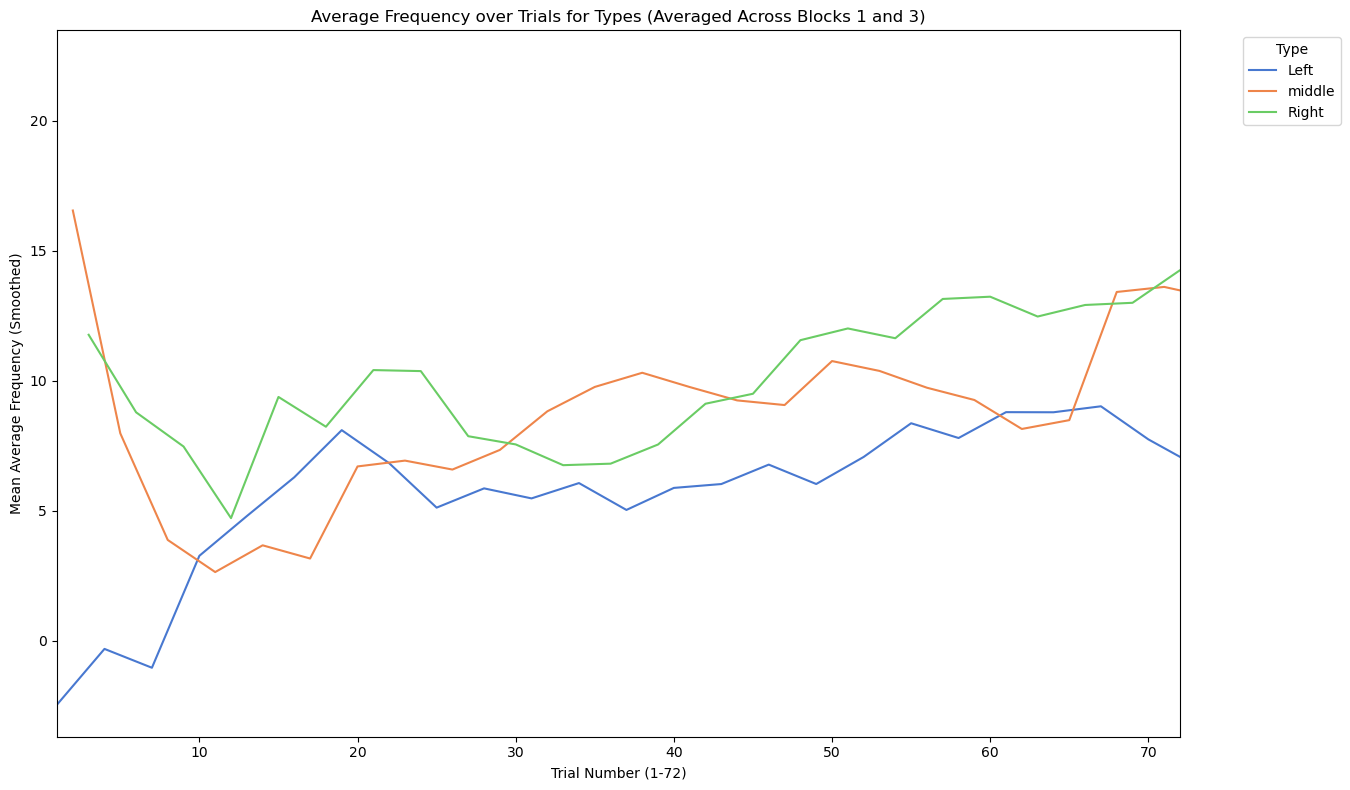

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming combined_df is already created from your CSV files

# Create a new column to average Freq_f1_t1_el1, Freq_f1_t2_el1, and Freq_f1_t3_el1
combined_df['Avg_Freq'] = combined_df[['Freq_f1_t1_el1', 'Freq_f1_t2_el1', 'Freq_f1_t3_el1']].mean(axis=1)

# Create separate dataframes for blocks 1 and 3
block_1 = combined_df[combined_df['Block'] == 1]
block_3 = combined_df[combined_df['Block'] == 3]

# Average the frequency for each block and type
block_1_avg = block_1.groupby(['epoch', 'type']).agg({'Avg_Freq': 'mean'}).reset_index()
block_3_avg = block_3.groupby(['epoch', 'type']).agg({'Avg_Freq': 'mean'}).reset_index()

# Create a new DataFrame for plotting with only the relevant trials (1 to 72)
# Since we only need trials 1 to 72, we will filter by 'epoch'
block_1_avg = block_1_avg[block_1_avg['epoch'].between(1, 72)]
block_3_avg = block_3_avg[block_3_avg['epoch'].between(1, 72)]

# Create a new trial column that goes from 1 to 72 for each block
block_1_avg['trial'] = range(1, len(block_1_avg) + 1)
block_3_avg['trial'] = range(1, len(block_3_avg) + 1)

# Combine the averages for blocks 1 and 3 into one DataFrame
combined_avg_1_3 = pd.concat([block_1_avg, block_3_avg], ignore_index=True)

# Average across blocks 1 and 3 for each type
final_avg_1_3 = combined_avg_1_3.groupby(['trial', 'type']).agg({'Avg_Freq': 'mean'}).reset_index()

# Apply a moving average to smooth the data
final_avg_1_3['Avg_Freq'] = final_avg_1_3.groupby('type')['Avg_Freq'].transform(lambda x: x.rolling(window=20, min_periods=1).mean())

# Set up the plot for blocks 1 and 3
plt.figure(figsize=(12, 8))

# Get the unique values of 'type' for coloring
types = final_avg_1_3['type'].unique()

# Create color palettes based on the number of unique types
block_colors = sns.color_palette("muted", n_colors=len(types))

# Simplified legend strings for 'type'
legend_labels = {
    'left': 'Left',
    'right': 'Right',
}

# Plot for each type
for i, typ in enumerate(types):
    subset = final_avg_1_3[final_avg_1_3['type'] == typ]
    sns.lineplot(data=subset, x='trial', y='Avg_Freq', label=legend_labels.get(typ, typ),
                 color=block_colors[i], markers=True, dashes=False)

# Set title and labels
plt.title('Average Frequency over Trials for Types (Averaged Across Blocks 1 and 3)')
plt.ylabel('Mean Average Frequency (Smoothed)')
plt.xlabel('Trial Number (1-72)')

# Set x-axis limits from 1 to 72
plt.xlim(1, 72)

# Adjust the layout to avoid overlapping
plt.tight_layout()

# Show the plot
plt.legend(title='Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
